Hello Paul!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>


# Sprint 2 Project: Exploratory Data Analysis

In [ ]:
# Import all methods
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Import all CSV files (all have ; separators)
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [ ]:
# Get basic info about each dataframe
orders.info()
products.info()
departments.info()
aisles.info()
order_products.info(show_counts=True) # Very large dataset: including show_counts=True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage:

In [ ]:
# Checking for missing values
print('Orders:') # Printing all missing value sums in a way that's easy to read for all 5 data frames
print(orders.isna().sum())
print()
print('Products:')
print(products.isna().sum())
print()
print('Departments:')
print(departments.isna().sum())
print()
print('Aisles:')
print(aisles.isna().sum())
print()
print('Order Products:')
print(order_products.isna().sum())

Orders:
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

Products:
product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

Departments:
department_id    0
department       0
dtype: int64

Aisles:
aisle_id    0
aisle       0
dtype: int64

Order Products:
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice initial review!
</div>

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [ ]:
# Check for duplicated orders

duplicate_orders = orders[orders['order_id'].duplicated()] # Creating a new df of duplicated order ID's from original df
duplicate_orders # Print new df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [ ]:
# Check for all orders placed Wednesday at 2:00 AM
# Assuming Wednesday is day 3 (Sunday = day 0)
orders_wed_2am = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)] # Creating a new df where the only rows are those with order_dow = 3 and order_hour_of_day = 2
print(orders_wed_2am) #Wed 2AM orders full dataframe
print(orders_wed_2am['order_id'].unique()) # Wed 2:00 AM order ID's only, in list format

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

In [ ]:
# Remove duplicate orders
orders = orders.drop_duplicates(subset='order_id') # Removing rows with duplicate order ID's, but not duplicates of other information that may be shared between non-duplicate orders

In [ ]:
# Double check for duplicate rows
orders.duplicated().sum() # Checking result with sum: 0 means no duplicates

0

In [ ]:
# Double check for duplicate order IDs only
orders['order_id'].duplicated().sum() # Checking result with sum: 0 means no duplicates

0

Summary: The orders data frame contained some duplicate Order ID's that has to be removed, and no longer contains any duplicate orders. There were 121 orders placed on a Wednesday at 2:00 AM.

### `products` data frame

In [ ]:
# Check for fully duplicate rows
products.duplicated().sum() # Checking result with sum: 0 means no duplicates

0

In [ ]:
# Check for just duplicate product IDs
products['product_id'].duplicated().sum() # Checking result with sum: 0 means no duplicates

0

In [ ]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'] = products['product_name'].str.lower() # Converting all product names to all lowercase
products['product_name'].sample(10) # Checking that a random 10 products are lowercase, showing the conversion worked

13923                                       curry powder
45304                           taters shredded potatoes
24426     snacks string cheese natural mozzarella cheese
4443                       clotted cream- english luxury
20326         organic all natural blueberry mini waffles
10308        low sodium condensed cream of mushroom soup
15858                     world harbor marinade sriracha
12763                 perfectly protein vanilla chai tea
3448                      moisturizing shampoo unscented
4843     gotta have vanilla organic frozen nonfat yogurt
Name: product_name, dtype: object

In [ ]:
# Check for duplicate product names that aren't missing
products['product_id'].duplicated().sum() # Checking result with sum: 0 means no duplicates

0

Summary: The products data frame contains no duplicates.

### `departments` data frame

In [ ]:
# Check for fully duplicate rows
departments.duplicated().sum() # Checking result with sum: 0 means no duplicates

0

Summary: The departments data frame contains no duplicates.

### `aisles` data frame

In [ ]:
# Check for fully duplicate rows
aisles.duplicated().sum() # Checking result with sum: 0 means no duplicates

0

Summary: The aisles data frame contains no duplicates.

### `order_products` data frame

In [ ]:
# Check for fullly duplicate rows
order_products.duplicated().sum() # Checking result with sum: 0 means no duplicates

0

In [ ]:
# Double check for any other tricky duplicates
order_products[order_products.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


Summary: The order_products data frame contains no duplicates.

## Find and remove missing values


### `products` data frame

In [ ]:
# Are all of the missing product names associated with aisle ID 100?
missing_products = products[products['product_name'].isna()]
missing_products['aisle_id'].unique()

array([100])

Yes, all missing product names are associated with Aisle ID 100.

In [ ]:
# Are all of the missing product names associated with department ID 21?
missing_products = products[products['product_name'].isna()]
missing_products['department_id'].unique()

array([21])

Yes, all missing product names are associated with Department ID 21.

In [ ]:
# What is this aisle and department?
# Checking departments data frame value at index 20 (corresponding to department ID 21) to return department name
print(departments.loc[20, 'department'])
# Checking aisles data frame value at index 99 (corresponding to aisle ID 100) to return aisle name
print(aisles.loc[99, 'aisle'])

missing
missing


Department ID 21 and Aisle ID 100 are both labeled as 'Missing' in their corresponding data frames.

In [ ]:
# Fill missing product names with 'Unknown'
# Missing product names can't be replaced in a general way, so we will mark them as 'Unknown' for now
# They may end up having to be excluded from analysis if the product names are important later on
products['product_name'] = products['product_name'].fillna('Unknown') 

I have replaced missing product names with 'Unknown'. These are real products but we don't have their names currently.

### `orders` data frame

In [ ]:
# Are there any missing values where it's not a customer's first order?
# We can assume that a missing value for days_since_prior_order means it's the customer's first order
print(orders.isna().nunique()) # Checking how many different missing values the days_since_prior_order column has
print()
print(sorted(orders['days_since_prior_order'].unique())) # Listing unique values of days_since_prior_order column

order_id                  1
user_id                   1
order_number              1
order_dow                 1
order_hour_of_day         1
days_since_prior_order    2
dtype: int64

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 29.0, 30.0, nan, 28.0]


A blank value in the Days Since Prior Order column means it's the customer's first order. However, a value of 0.0 in this column may just mean it hasn't yet been a full day since the customer last ordered, since this data does not include decimals of days that have passed since ordering, therefore any period before 1 day would display as 0.0 days. On that note, we should convert this data column to the integer data type for clarity.

In [ ]:
# Converting days_since_prior_order from float64 to int64 for clarity
orders['days_since_prior_order'] = orders['days_since_prior_order'].astype(int, errors='ignore')
# Verifying the change to data type
orders.dtypes

order_id                    int64
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

### `order_products` data frame

In [ ]:
# What are the min and max values in this column?
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

1.0
64.0


In the Add to Cart Order column of the Order Products data frame, the minimum value is 1.0 and the maximum value is 64.0.

In [ ]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
# Create a new data frame with all data for order ID's with missing value in 'add_to_cart_order'
order_products_missing = order_products[order_products['add_to_cart_order'].isna()]
order_products_missing

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [ ]:
# Do all of these orders contain more than 64.0 products?
# Update new data frame to drop duplicate order IDs
order_products_missing_unique = order_products_missing['order_id'].drop_duplicates()
order_products_missing_unique

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
2437093       9310
2438301    2170451
3275635    2979697
3282194    1625713
3357079    1529171
Name: order_id, Length: 70, dtype: int64

There are 836 total Order ID's among those with missing values in the Add to Cart Order column, but only 70 unique Order ID's present. Therefore, these orders likely have more than 64 products and the correct number of products is not being correctly displayed by the data in that column. However, it is impossible for *ALL* 70 of these orders to contain more than 64 products, because 836 / 70 = 11.9 which is below 65.

In [ ]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna('999')
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int', errors='ignore')
# Verifying the change to data type
order_products.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great preprocessing!
</div>

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [ ]:
# Checking each of these values by assigning unique values to a variable and printing it in ascending order for clarity
hod = orders['order_hour_of_day'].unique()
print('Hour of Day Values =',sorted(hod))

Hour of Day Values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [ ]:
dow = orders['order_dow'].unique()
print('Order Day of Week Values =',sorted(dow))

Order Day of Week Values = [0, 1, 2, 3, 4, 5, 6]


The Order Hour of Day and Order Day of Week values in the Orders data are sensible and range from 0-23 and 0-6 respectively.

### [A2] What time of day do people shop for groceries?

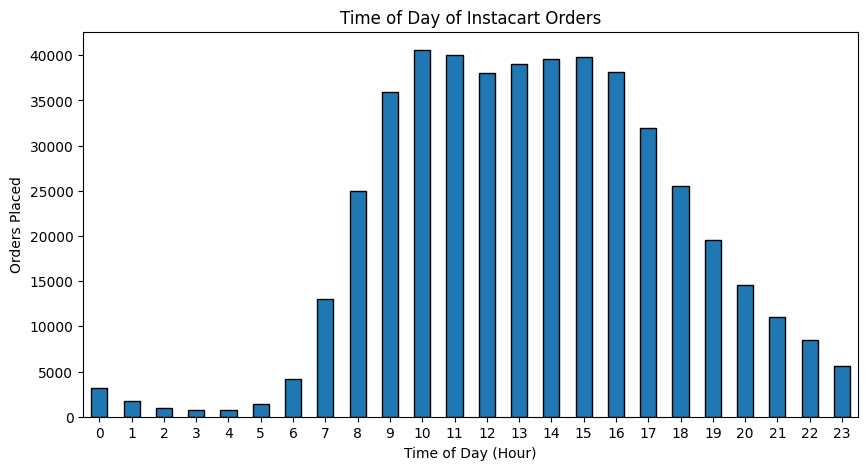

In [ ]:
# Plotting time of day of orders
orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar',
           title='Time of Day of Instacart Orders',     
           xlabel='Time of Day (Hour)',
           ylabel='Orders Placed',
           rot=0,
           legend=False,
           width=0.5,
           edgecolor='k',
           figsize=(10, 5))
plt.show()

As shown in the plot above, the most common time of day for an Instacart order to be placed is during the 10:00 AM hour.

### [A3] What day of the week do people shop for groceries?

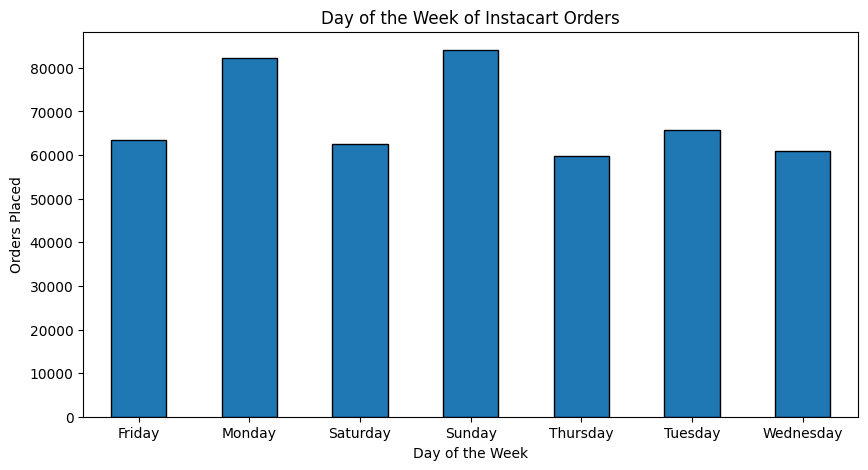

In [ ]:
# Plotting the day of week of orders
#day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
orders_for_plot = orders
orders_for_plot['order_dow'] = orders['order_dow'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
orders_for_plot['order_dow'].value_counts().sort_index().plot(kind='bar',
           title='Day of the Week of Instacart Orders',
           xlabel='Day of the Week',
           ylabel='Orders Placed',
           rot=0,
           legend=False,
           width=0.5,
           edgecolor='k',
           figsize=(10, 5))
plt.show()
# I wasn't able to fix the order of the days of the week, but it's still better than showing 0-6 for the days

As shown in the plot above, the most common day of the week for an Instacart order to be placed is Sunday.

### [A4] How long do people wait until placing another order?

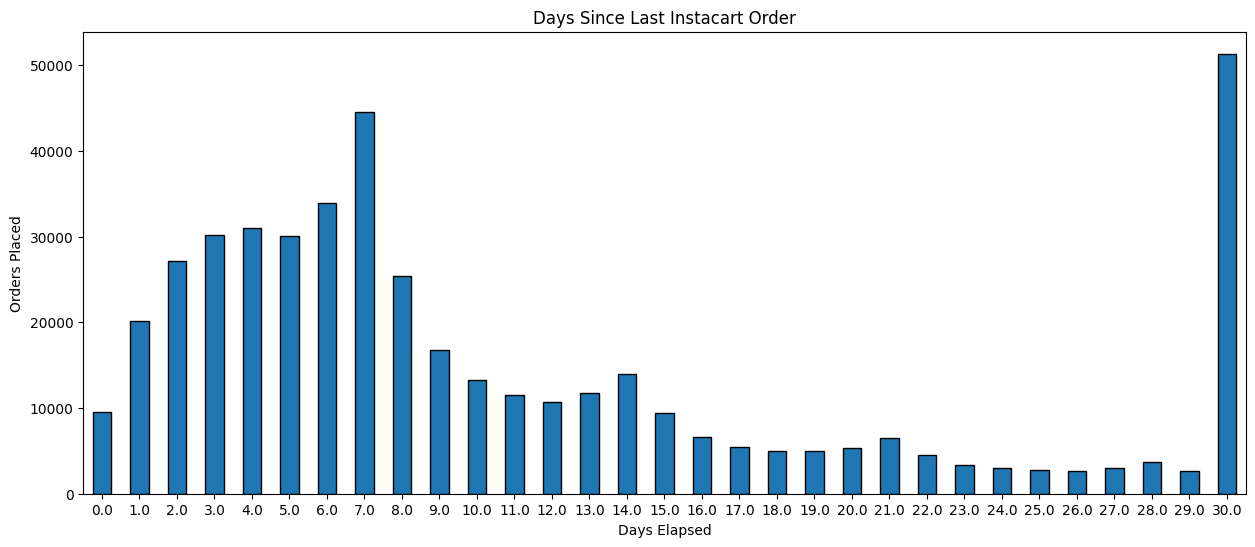

In [ ]:
# Plotting length of time until next order
# Comment on min and max values
#orders_for_days_plot = orders
#orders_for_days_plot['days_since_prior_order'] = orders_for_days_plot['days_since_prior_order'].astype(int)
orders['days_since_prior_order'].value_counts().sort_index().plot(kind='bar',
           title='Days Since Last Instacart Order',
           xlabel='Days Elapsed',
           ylabel='Orders Placed',
           xlim=[-0.5,30],
           rot=0,
           legend=False,
           width=0.5,
           edgecolor='k',
           figsize=(15, 6))
plt.show()
# I tried to remove decimals from all values as it adds no information, but I wasn't able to switch it to int64 data type

**Summary:

As shown in the plot above, the most common duration in days since the customer's last Instacart order is either 7 or 30 days, representing weekly and monthly grocery orders. It is not known if Instacart tracked this data beyond a 30 day period.

The minimum value of this data set is 0 days, meaning the customer ordered again before a full 24 hours had passed. This likely means they forgot something in their original order and needed to place a second order quickly. The maximum value, 30 days, represents about a 1 month period, suggesting monthly grocery ordering. It is not known if Instacart tracked this data beyond a 30 day period. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [ ]:
# Defining new data frames for Wednesday and Saturday Orders
# Recall I changed days of the week from numbers to day names in 2.6 above
wednesday_orders = orders[orders['order_dow'] == 'Wednesday']
saturday_orders = orders[orders['order_dow'] == 'Sunday']
# Printing info for the new data frames to double check filtering
wednesday_orders.info()
saturday_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60897 entries, 6 to 478965
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                60897 non-null  int64  
 1   user_id                 60897 non-null  int64  
 2   order_number            60897 non-null  int64  
 3   order_dow               60897 non-null  object 
 4   order_hour_of_day       60897 non-null  int64  
 5   days_since_prior_order  57271 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 3.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84090 entries, 3 to 478959
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                84090 non-null  int64  
 1   user_id                 84090 non-null  int64  
 2   order_number            84090 non-null  int64  
 3   order_dow               84

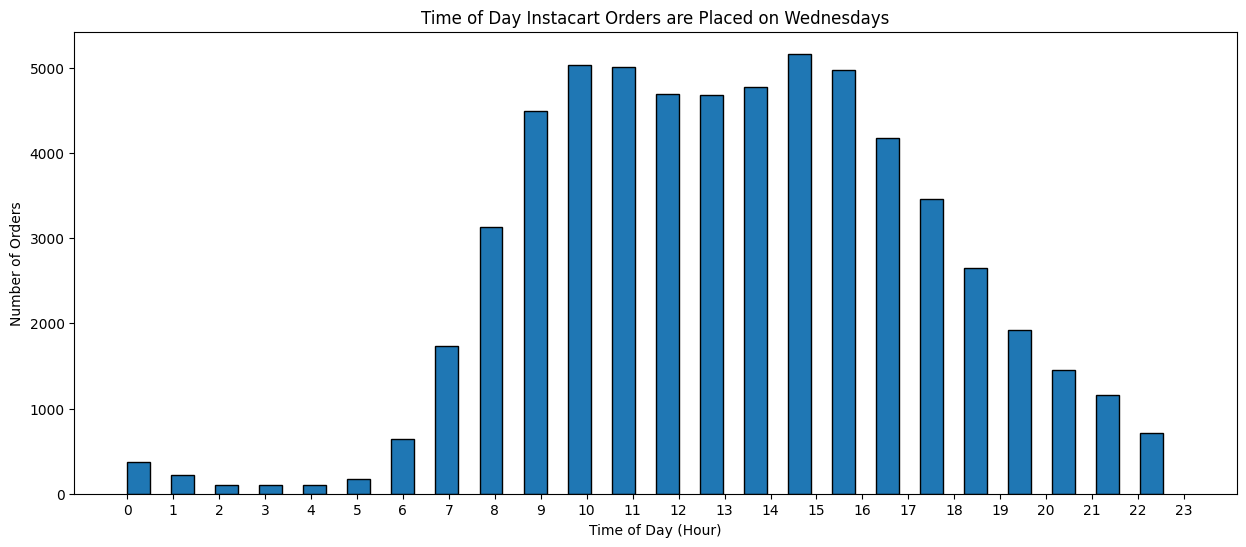

In [ ]:
#Plotting the Wednesday Order data
wednesday_orders['order_hour_of_day'].plot(kind='hist',
           title='Time of Day Instacart Orders are Placed on Wednesdays',
           xlabel='Time of Day (Hour)',
           ylabel='Orders Placed',
           xticks=range(0, 24),
           bins=24,
           rot=0,
           legend=False,
           width=0.5,
           edgecolor='k',
           figsize=(15, 6),
           align='mid')
plt.xlabel('Time of Day (Hour)') # Not sure why this is needed when I have it above - only this one works
plt.ylabel('Number of Orders') # Not sure why this is needed when I have it above - only this one works
plt.show()
# Not sure how to center x-axis tick labels under the bars

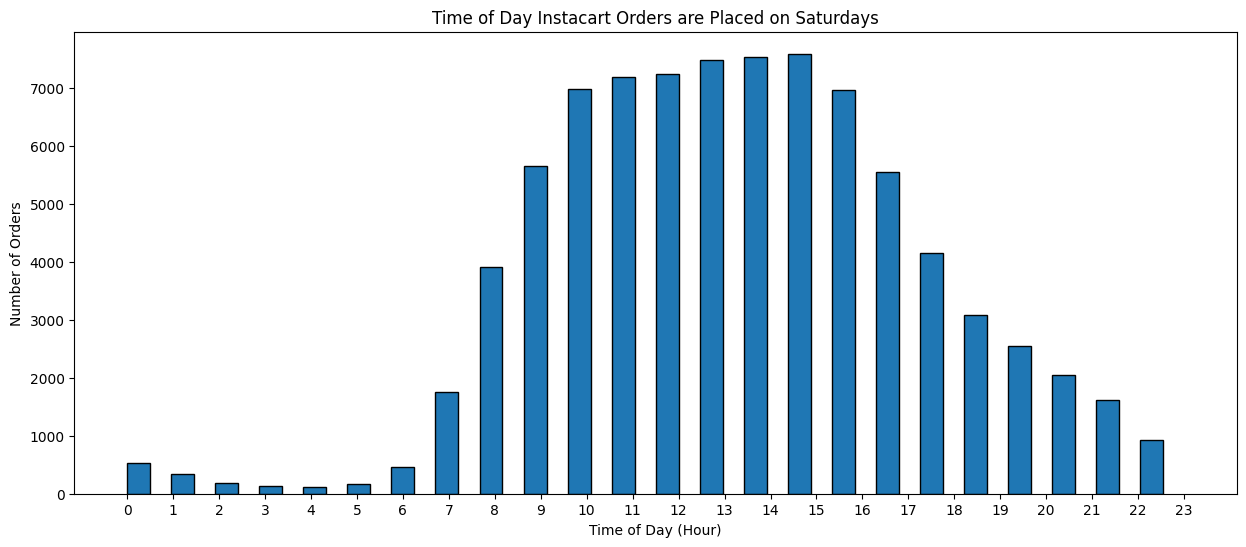

In [ ]:
#Plotting the Saturday Order data
saturday_orders['order_hour_of_day'].plot(kind='hist',
           title='Time of Day Instacart Orders are Placed on Saturdays',
           xlabel='Time of Day (Hour)',
           ylabel='Orders Placed',
           xticks=range(0, 24),
           bins=24,
           rot=0,
           legend=False,
           width=0.5,
           edgecolor='k',
           figsize=(15, 6))
plt.xlabel('Time of Day (Hour)') # Not sure why this is needed when I have it above - only this one works
plt.ylabel('Number of Orders') # Not sure why this is needed when I have it above - only this one works
plt.show()
# Not sure how to center x-axis tick labels under the bars

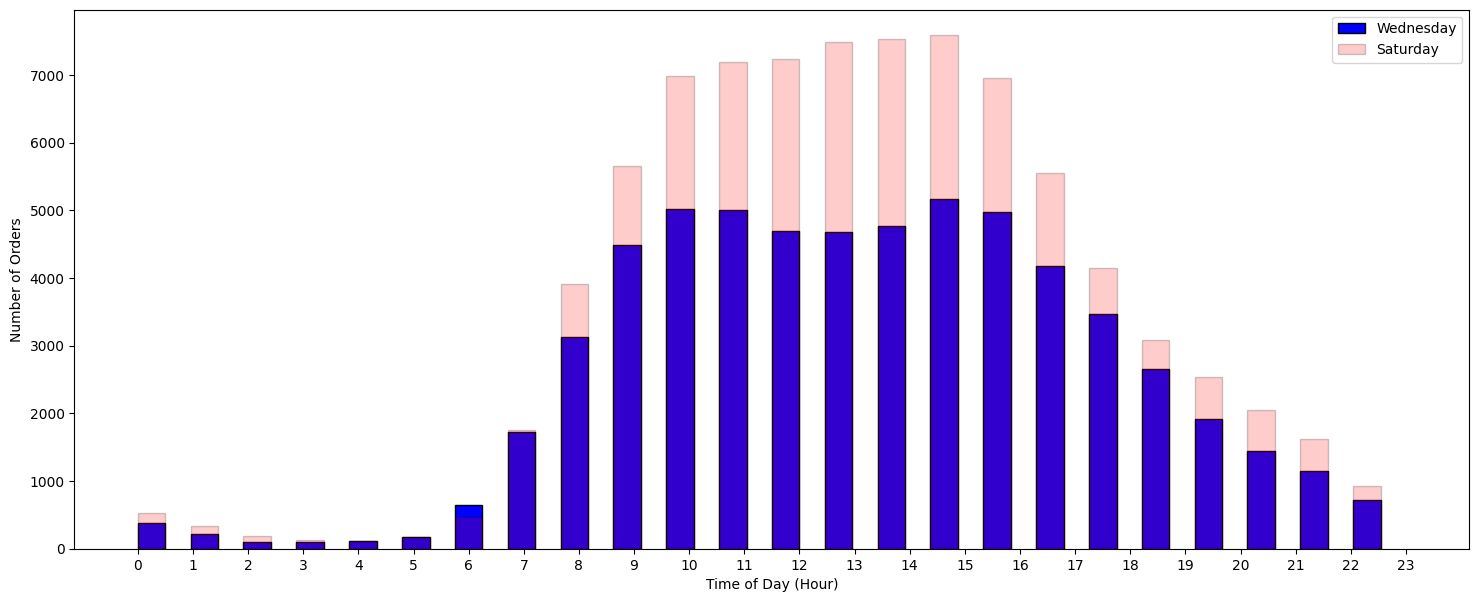

In [ ]:
# Plotting both Wednesday and Saturday Order histograms together for a more visual comparison (trying .hist method now)
plt.figure(figsize=(18, 7))

# Plot Wednesday orders
plt.hist(
    x=wednesday_orders['order_hour_of_day'],
    bins=range(25),  # This will create bins for each hour (0-24)
    label='Wednesday',
    alpha=1,
    color='blue',
    width=0.4,
    align='left',  # Align bars with ticks
    edgecolor='black',
    linewidth=1
)

# Plot Saturday orders
plt.hist(
    x=saturday_orders['order_hour_of_day'],
    bins=range(25),
    label='Saturday',
    alpha=0.5,
    color='red',
    width=0.4,
    align='left',
    edgecolor='black',
    linewidth=1
)

# Add labels and title
plt.xticks(range(0, 24))  # Set x-ticks to represent hours
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Number of Orders')
plt.title('Number of Orders on Wednesdays and Saturdays')
plt.legend()

# Apply tight layout to avoid clipping issues
plt.tight_layout()

# Show the plot
plt.show()
# The clarity of this plot isn't perfect due to the overlap of the colors based on alpha. Stacked bar might be better.
# Same issue of uncentered x-axis labels as above, not sure how to fix

**Summary: 

There is a difference between the typical time of day an Instacart order is placed on Wednesdays versus Saturdays. On Wednesdays, the peak hours are 11:00 AM - 12:00 PM, as well as 4:00 - 5:00 PM. The peak hours for Saturdays fall between these two periods: 1:00 - 3:00 PM. This is likely explained due to more people being at work during the day on Wednesdays versus Saturdays.

### [B2] What's the distribution for the number of orders per customer?

In [ ]:
# Group by user_id and count the number of orders per customer
orders_per_customer = orders.groupby('user_id')['order_id'].count()

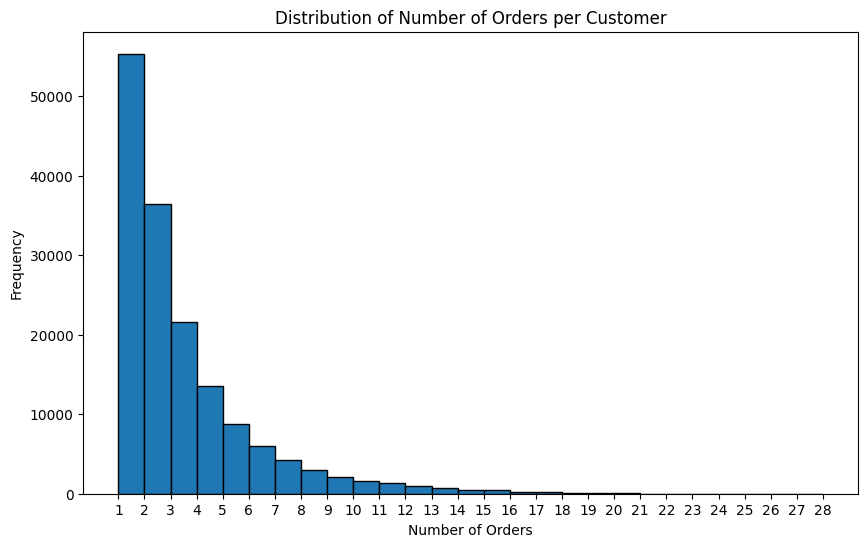

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(orders_per_customer, bins=range(1, orders_per_customer.max() + 1), edgecolor='k', alpha=1)
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.xticks(range(1, orders_per_customer.max() + 1))
plt.show()

Summary: There is something close to an exponential decay of customer loyalty over time, as shown by the shape of the above plot. It is by far the most common for a customer to have only placed one order since they are new to Instacart. Over time, customers stop ordering, therefore it is increasingly rare to have customers with higher numbers of orders over time.

### [B3] What are the top 20 popular products (display their id and name)?

In [ ]:
# Count the number of times each product_id appears
product_counts = order_products['product_id'].value_counts()
product_counts.head(20)

24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: product_id, dtype: int64

In [ ]:
# Get the top 20 products
top_20_products = product_counts.head(20)
top_20_products = pd.DataFrame(top_20_products, columns=['product_id'])
top_20_products

,product_id
24852,66050
13176,53297
21137,37039
21903,33971
47209,29773
47766,24689
47626,21495
16797,20018
26209,19690
27845,19600


In [ ]:
# Look up product names from product data frame using product_ids in top_20_products
top_20_product_id_and_name = products[products['product_id'].isin(top_20_products['product_id'])][['product_id', 'product_name']]
top_20_product_id_and_name
# The products below aren't the correct 20, not sure why

,product_id,product_name
11780,11781,mushroom- spinach- and salsa tamales
11992,11993,sharp cheddar cheese slices
12231,12232,original diced tomatoes & green chilies
12543,12544,mezze penne pasta
13674,13675,pure tart cherry 100% juice
13878,13879,organic green tea with ginger
14583,14584,chewy chocolate made with reese's peanut butte...
15291,15292,made vitamin d3 1000 i.u
15897,15898,mango peach omega swirl omage-3 fish oil suppl...
19196,19197,show me the honey crunchy coconut chips


**Summary:

As seen in the table above, the 20 most common products are common household staple items, such as bananas, rice, and ice. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Excellent!
</div>

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [ ]:
# Count the number of times each order ID appears in order_products since each row is 1 item
order_counts = order_products['order_id'].value_counts()
# Printing order_counts and describing it for statistical information
print(order_counts)
order_counts.describe()

61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
54659        1
210431       1
1717983      1
1136563      1
8196         1
Name: order_id, Length: 450046, dtype: int64


count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: order_id, dtype: float64

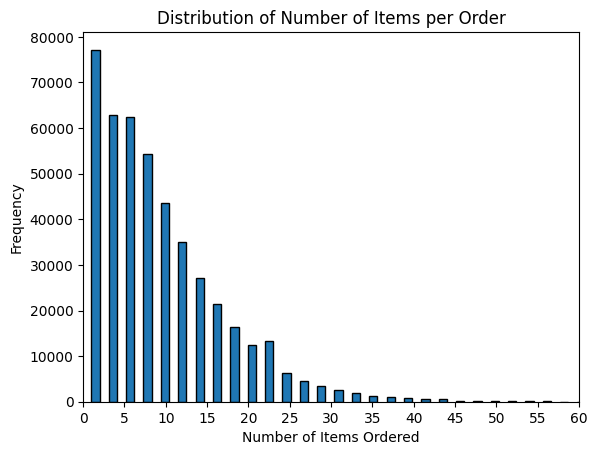

In [ ]:
plt.hist(order_counts, bins=60, edgecolor='k', alpha=1, width=1) # I wasn't clear on number of bins - it always seems to skip values on the x-axis
plt.title('Distribution of Number of Items per Order')
plt.xlabel('Number of Items Ordered')
plt.ylabel('Frequency')
plt.xlim(0,60)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60])
plt.show()

**Summary:

The number of items ordered in a single Instacart order appears to follow a roughly exponential decrease (see histogram above) as the number of items increases. This makes sense because ordering fewer items is substantially more common than larger, more elaborate orders. As the complexity and size of the order increases, fewer customers are placing such an order. 

The average amount of items per order is 10. 

The minimum is 1, while the maximum is 127.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [ ]:
# Count the number of times each product_id appears on reorders (reorder=1)
reordered_order_products_df = order_products[order_products['reordered'] == 1]
reordered_order_products = reordered_order_products_df['product_id'].value_counts()
reordered_order_products

24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
         ...  
2591         1
29201        1
27154        1
10789        1
2049         1
Name: product_id, Length: 36228, dtype: int64

In [ ]:
# Get the top 20 products
top_20_reordered_products = reordered_order_products_df.head(20)
top_20_reordered_products

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1
6,644579,12341,5,1
7,2231852,44925,10,1
8,3185766,36259,14,1
9,420019,23315,4,1
10,925051,9421,2,1


In [ ]:
# Look up product names from product data frame using product_ids in top_20_products
top_20_reordered_product_id_and_name = products[products['product_id'].isin(top_20_reordered_products['product_id'])][['product_id', 'product_name']]
top_20_reordered_product_id_and_name

,product_id,product_name
1559,1560,bag of ice
1939,1940,organic 2% reduced fat milk
4320,4321,california endive farms
8669,8670,diced tomatoes
9420,9421,organic raw multigreen kobmbucha
10016,10017,tilapia filet
12340,12341,hass avocados
13175,13176,bag of organic bananas
21615,21616,organic baby arugula
21902,21903,organic baby spinach


**Summary:

As seen in the table above, the 20 most commonly reordered products are common household staple items, such as bananas, rice, and ice. 

### [C3] For each product, what proportion of its orders are reorders?

In [ ]:
# Separating product reorders and total product orders and counting the number of times each appears in order_products
# Making new data frame of order_products filtering just reordered products
product_reorders_df = order_products[order_products['reordered'] == 1]
# Converting product reorder data frame into series of value counts
product_reorders = product_reorders_df['product_id'].value_counts()
print(product_reorders)
# Series of total product orders value counts
total_orders = order_products['product_id'].value_counts()
print(total_orders)

24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
         ...  
2591         1
29201        1
27154        1
10789        1
2049         1
Name: product_id, Length: 36228, dtype: int64
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
         ...  
10543        1
5222         1
2347         1
11893        1
32074        1
Name: product_id, Length: 45573, dtype: int64


In [ ]:
# Divide reordered product orders by total product orders for proportion reordered
proportion_reordered = product_reorders / total_orders
# Append proportion reordered to product data frame
products['reordered total'] = product_reorders
# Append total product orders to product data frame
products['ordered total'] = total_orders
# Append proportion reordered to product data frame to associate data with products
products['proportion_reordered'] = proportion_reordered
products

,product_id,product_name,aisle_id,department_id,reordered total,ordered total,proportion_reordered
0,1,chocolate sandwich cookies,61,19,NaN,NaN,NaN
1,2,all-seasons salt,104,13,158.0,280.0,0.564286
2,3,robust golden unsweetened oolong tea,94,7,NaN,11.0,NaN
3,4,smart ones classic favorites mini rigatoni wit...,38,1,31.0,42.0,0.738095
4,5,green chile anytime sauce,5,13,25.0,49.0,0.510204
...,...,...,...,...,...,...,...
49689,49690,high performance energy drink,64,7,NaN,1.0,NaN
49690,49691,original pancake & waffle mix,130,14,4.0,5.0,0.800000
49691,49692,organic instant oatmeal light maple brown sugar,130,14,31.0,72.0,0.430556
49692,49693,spring water body wash,127,11,5.0,12.0,0.416667


**Summary:

The amount of reorders, total orders, and proportion of each product ordered as reorders are shown in the table above (last 3 columns).

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job.
</div>

### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Our recommendation is to add some final conclusion.
</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>

Thank you for sending your project. You've done a really good job on it!
    
Especially impressed:

- good conclusions
    
- nice graphs
    
- high code level

- good project structure
    
    
Thank you for in-depth analysis and logical conclusions!
    
I'm glad to say that your project has been accepted. Keep up the good work and good luck on the next sprint!
</div>